##**JOB QUALIFICATIONS DATA SET **
![an image](https://profesorweb.es/wp-content/uploads/2013/01/Job-Skills-475x220-1.jpg)


Job skills play a pivotal role in defining the competencies and qualifications required for individuals to perform specific roles within the workforce. These skills encompass a diverse range of abilities, knowledge, and expertise that enable employees to carry out their responsibilities effectively. The analysis conducted on the "rayjohnsoncomedy/job-skills" Kaggle Kernel likely explores and evaluates these job skills within a dataset.




![an image](https://th.bing.com/th/id/OIP._zDc7q43vwmVpesqZi4JUAHaHw?w=158&h=180&c=7&r=0&o=5&dpr=2&pid=1.7)
Key components of job skills include:

1. *Technical Competence:*
   - Mastery of industry-specific tools, technologies, and methodologies.
   - Expertise in software, programming languages, or other technical requirements.

2. *Soft Skills:*
   - Communication: Verbal and written communication skills for effective interaction.
   - Teamwork: Collaborative abilities to work efficiently in a team environment.
   - Leadership: Qualities that contribute to guiding and motivating others.

3. *Analytical and Problem-Solving Skills:*
   - Critical thinking and analytical abilities to solve complex problems.
   - Adaptability and creativity in addressing challenges.

4. *Domain-Specific Knowledge:*
   - Industry-specific knowledge and understanding of relevant concepts.
   - Expertise in areas specific to the job role.

5. *Interpersonal Skills:*
   - Relationship-building skills for effective interactions with colleagues and clients.
   - Emotional intelligence for navigating social dynamics.


![an image](https://blogs.3ds.com/apsouth/wp-content/uploads/sites/16/2018/10/Digital-Skills.jpg)




The Kaggle Kernel analysis likely delves into the dataset to identify patterns, clusters, or associations related to these job skills. This information can be invaluable for talent acquisition, career development, and organizational planning.

In [ ]:
  import numpy as np
import pandas as pd
import io

df = pd.read_csv("/content/job_skills.csv")
df.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,..."
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


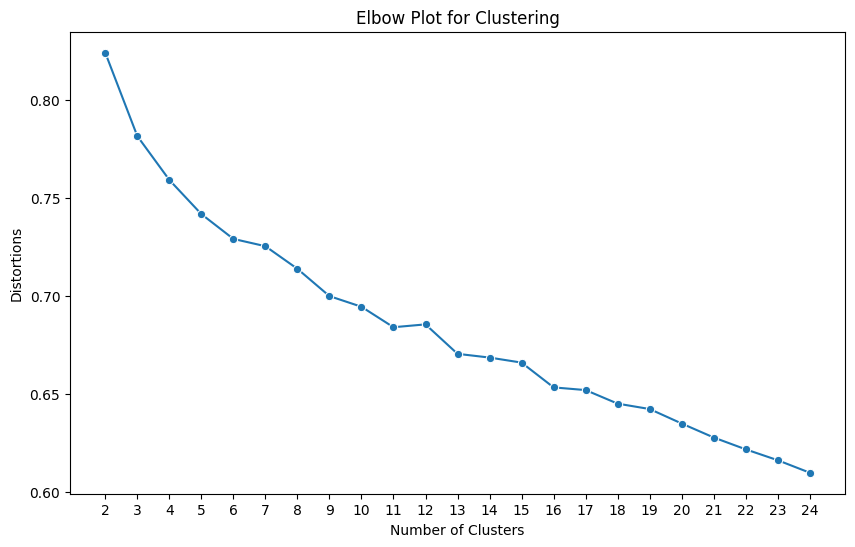

Cluster 1: exper
Cluster 2: relev
Cluster 3: work
Cluster 4: year
Cluster 5: equiv
Cluster 6: pract
Cluster 7: babs
Cluster 8: degre
Cluster 9: field
Cluster 10: relat
Cluster 11: andor
Cluster 12: indus
Cluster 13: manag
Cluster 14: eg
Cluster 15: consu
Cluster 16: busin
Cluster 17: bache
Cluster 18: opera
Cluster 19: worki
Cluster 20: scien
Cluster 21: marke
Cluster 22: inclu
Cluster 23: 10
Cluster 24: role
Cluster 25: engin
Cluster 26: analy
Cluster 27: envir
Cluster 28: techn
Cluster 29: manag
Cluster 30: desig
Cluster 31: devel
Cluster 32: techn
Cluster 33: sale
Cluster 34: team
Cluster 35: abili
Cluster 36: strat
Cluster 37: syste
Cluster 38: maste
Cluster 39: data
Cluster 40: progr
Cluster 41: mba
Cluster 42: web
Cluster 43: mediu
Cluster 44: minim
Cluster 45: clien
Cluster 46: corpo
Cluster 47: proje
Cluster 48: able
Cluster 49: servi
Cluster 50: softw
Cluster 51: compu
Cluster 52: inter
Cluster 53: commu
Cluster 54: basis
Cluster 55: educa
Cluster 56: must
Cluster 57: 2018
Clu

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.decomposition import NMF
from sklearn.preprocessing import Normalizer, MaxAbsScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.cluster.vq import kmeans
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import string
from google.colab import files
import io
import os

# Download NLTK punkt, wordnet, and stopwords resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Define stop words
stop_words_0 = set(nltk.corpus.stopwords.words('english'))

# Define additional stop words
stop_words = ['and', 'in', 'of', 'or', 'with', 'to', 'on', 'a']

# Specify the filename
file_name = 'job_skills.csv'

# Check if the file is already present in the root directory
if os.path.exists(file_name):
    # File is present, so load it
    df = pd.read_csv(file_name)
else:
    # File not present, ask the user to upload it
    uploaded_files = files.upload()
    uploaded_file_content = uploaded_files[file_name] if file_name in uploaded_files else None

    if uploaded_file_content is not None:
        # Load the dataset
        df = pd.read_csv(io.StringIO(uploaded_file_content.decode('utf-8')))
    else:
        print(f"File '{file_name}' not found among the uploaded files.")
        # You might want to handle this case based on your specific requirements

# Rename columns for ease of use
df = df.rename(columns={'Minimum Qualifications': 'Minimum_Qualifications', 'Preferred Qualifications': 'Preferred_Qualifications'})

# Function to remove noise from text
def remove_noise(text):
    if isinstance(text, str):  # Check if the input is a string
        tokens = word_tokenize(text)
        clean_tokens = []
        lemmatizer = WordNetLemmatizer()
        for token in tokens:
            token = re.sub('[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]+', '', token)
            token = lemmatizer.lemmatize(token.lower())
            if len(token) > 1 and token not in stop_words_0 and token not in stop_words:
                clean_tokens.append(token)
        return clean_tokens
    else:
        return []  # If not a string, return an empty list

# Perform Text Preprocessing
def preprocess_text_columns(df, text_columns):
    for col in text_columns:
        df[col] = df[col].apply(remove_noise)
        df[col] = df[col].apply(lambda x: ' '.join(x))
    return df

# Visualize Elbow Plot for Clustering
def plot_elbow(num_clusters, distortions):
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=num_clusters, y=distortions, marker='o')
    plt.xticks(num_clusters)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortions')
    plt.title('Elbow Plot for Clustering')
    plt.show()

# NMF and Similarity Analysis
def perform_nmf_similarity_analysis(df, text_column):
    vectorizer = TfidfVectorizer(max_features=100, tokenizer=remove_noise)

    # Handle NaN values by replacing them with an empty string
    df[text_column] = df[text_column].fillna('')

    tfidf_matrix = vectorizer.fit_transform(df[text_column])

    scaler = MaxAbsScaler()
    model = NMF(n_components=100)
    normalizer = Normalizer()
    pipeline = make_pipeline(scaler, model, normalizer)

    result_matrix = pipeline.fit_transform(tfidf_matrix)
    result_df = pd.DataFrame(result_matrix, index=df['Title'])
    return result_df

# Display top terms for each cluster
def display_top_terms(cluster_centers, vectorizer, num_clusters=13):
    feature_names = vectorizer.get_feature_names_out()

    for i in range(num_clusters):
        center_terms = dict(zip(feature_names, list(cluster_centers[i])))
        sorted_terms = sorted(center_terms, key=center_terms.get, reverse=True)
        if sorted_terms:
            for i, cluster in enumerate(sorted_terms):
                print(f"Cluster {i + 1}: {cluster[:5]}")
        else:
            print(f"No terms found for Cluster {i + 1}")

# Main analysis

# Initial exploration and preprocessing...
# ...

# Text preprocessing
text_columns = ['Minimum_Qualifications', 'Preferred_Qualifications']
df = preprocess_text_columns(df, text_columns)

# NMF and Similarity analysis for Responsibilities
responsibilities_result_df = perform_nmf_similarity_analysis(df, 'Responsibilities')

# NMF and Similarity analysis for Minimum Qualifications
requirements_result_df = perform_nmf_similarity_analysis(df, 'Minimum_Qualifications')

# Clustering...
tfidf_vectorizer = TfidfVectorizer(max_features=100, tokenizer=remove_noise)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Minimum_Qualifications'])
num_clusters = range(2, 25)

distortions = []
for i in num_clusters:
    cluster_centers, distortion = kmeans(tfidf_matrix.todense(), i)
    distortions.append(distortion)

plot_elbow(num_clusters, distortions)

# Choose an optimal number of clusters based on the elbow plot
optimal_num_clusters = 13
cluster_centers, distortion = kmeans(tfidf_matrix.todense(), optimal_num_clusters)

# Display top terms for each cluster
display_top_terms(cluster_centers, tfidf_vectorizer)


# Job Skills Analysis Script

## Overview
This script analyzes job skills data to identify clusters of similar job requirements. It uses Natural Language Processing (NLP) techniques, including Text Preprocessing, Non-negative Matrix Factorization (NMF), and k-means clustering.

## Requirements
- Python 3.x
- Libraries: numpy, pandas, matplotlib, seaborn, nltk, scikit-learn

## Usage

1. Download the script and ensure you have the required libraries installed:

   ```bash
   pip install numpy pandas matplotlib seaborn nltk scikit-learn
2. Run the script:
python job_skills_analysis.py

3. Follow the on-screen instructions to upload the 'job_skills.csv' file if not present in the root directory.

4. Explore the results:
	Elbow Plot: The script generates an elbow plot to help choose the optimal number of clusters.
	Top Terms: The top terms for each cluster are displayed based on the identified clusters.

# Script Structure

Data Loading: Checks if 'job_skills.csv' is present; otherwise, asks the user to upload it.
Text Preprocessing: Cleans and preprocesses text data.
NMF and Similarity Analysis: Applies NMF and similarity analysis to extract features from text data.
Clustering: Performs k-means clustering and generates an elbow plot to determine the optimal number of clusters.
Top Terms Display: Displays the top terms for each cluster.

# Note

Make sure to have NLTK resources downloaded (punkt, wordnet, stopwords).
Feel free to modify the script as needed for your specific use case.


This README provides a quick overview of what your script does, the required dependencies, and instructions for running it. You may want to customize it further based on your specific needs.
